In [3]:
import pywt
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Wavelet Decomposition

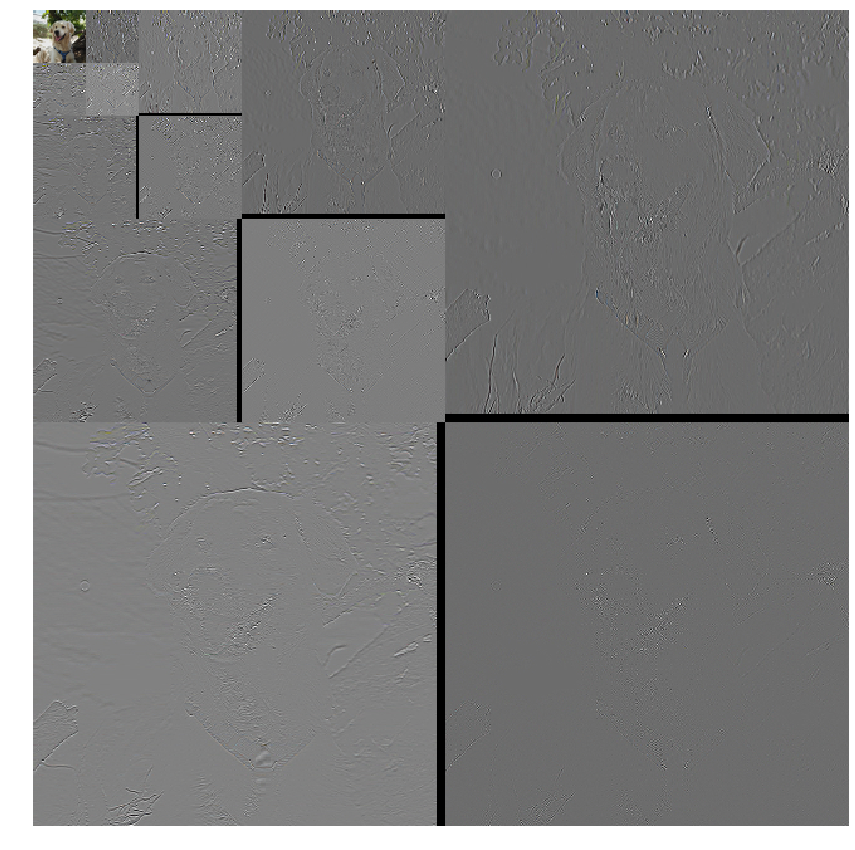

In [38]:
img = np.array(Image.open("dog.png"))

WAVELET = "db2"
coeffs = pywt.wavedec2(img, WAVELET, level=4, axes=(0, 1))
for i, c in enumerate(coeffs):
    if isinstance(c, tuple):
        coeffs[i] = tuple([(x - x.min())/(x.max() - x.min()) for x in c])
    else:
        coeffs[i] = (c - c.min()) / (c.max() - c.min())
        
coeff_arr, _ = pywt.coeffs_to_array(coeffs, axes=(0,1))

plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(coeff_arr)
plt.savefig("wavelet_decomp.png", bbox_inches='tight')

# Results

In [4]:
from WaveletImageCoder import WaveletImageEncoder, WaveletImageDecoder
from utils import comp_ratio

img = np.array(Image.open("dog.png"))

outputs, crs = [], []
max_passes = [5, 10, 15, 20, 25, float('inf')]
for mp in max_passes:
    encoder = WaveletImageEncoder(mp)
    encoder.encode(img, "tmp.ztc")
    decoder = WaveletImageDecoder()
    outputs.append(decoder.decode("tmp.ztc"))
    crs.append(comp_ratio("dog.png", "tmp.ztc"))

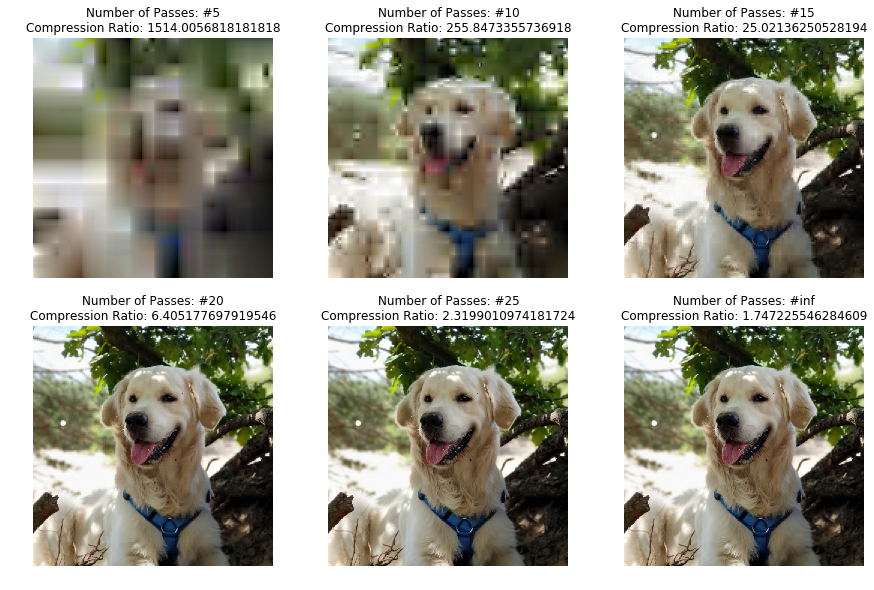

In [8]:
plt.figure(figsize=(15, 15))
for i in range(6):
    plt.subplot(3, 3, i + 1)
    plt.title(f"Number of Passes: #{max_passes[i]}\nCompression Ratio: {crs[i]}")
    plt.axis('off')
    plt.imshow(outputs[i])
plt.savefig("comp_results.png", bbox_inches='tight')